Initial: [ 3.14159265 10.         50.          0.         10.          0.        ]
Fitted: [ 2.44101695e+00  1.02216675e+01  5.50744633e+01  1.37695477e+01
 -7.37919792e+01  1.95317830e-02]


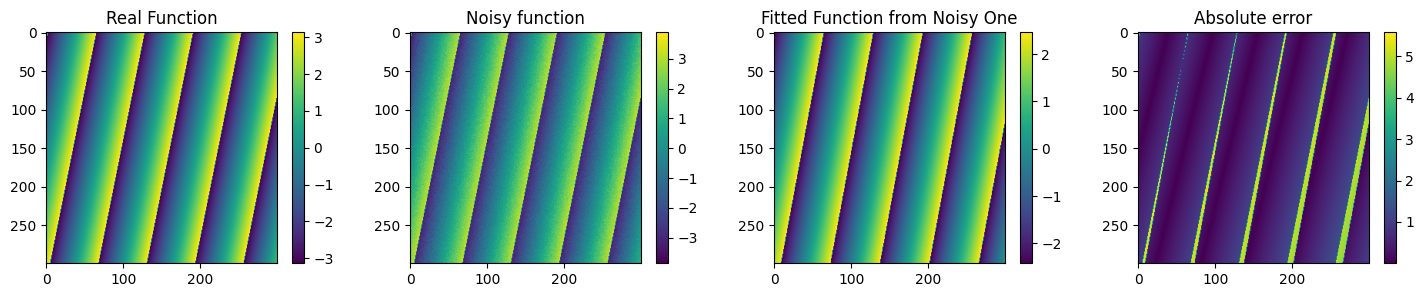

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import sawtooth

x = np.zeros((300,300))

def sawtooth_2d(x, amp, a, b, c, d, s):
    return amp * sawtooth((x[0] - c)/a + (x[1] - d)/b) + s


x_grid = np.arange(0, x.shape[0])
y_grid = np.arange(0, x.shape[1])
X, Y = np.meshgrid(x_grid, y_grid)

x_data = np.vstack((X.reshape((1, X.size)), Y.reshape((1, Y.size))))

orig = (np.pi, 10, 50, 0, 10, 0)
z = sawtooth_2d(x_data, *orig)
z_noise = z + 0.2*np.random.randn(*z.shape)
y_data = z_noise


# Curve fit
p0 = np.array(orig) + 1*np.random.randn(len(orig))
popt, pcov = curve_fit(sawtooth_2d, x_data, y_data, p0=p0)

print(f"Initial: {np.array(orig)}")
print(f"Fitted: {popt}")

z_fit = sawtooth_2d(x_data, *popt)


fig, axs = plt.subplots(1, 4, figsize=(18,3))
axs[0].set_title("Real Function")
pl0 = axs[0].imshow(z.reshape(*X.shape))
plt.colorbar(pl0, ax=axs[0])

axs[1].set_title("Noisy function")
pl1 = axs[1].imshow(z_noise.reshape(*X.shape))
plt.colorbar(pl1, ax=axs[1])

axs[2].set_title("Fitted Function from Noisy One")
pl2 = axs[2].imshow(z_fit.reshape(*X.shape))
plt.colorbar(pl2, ax=axs[2])

axs[3].set_title("Absolute error")
pl3 = axs[3].imshow(np.abs((z_fit - z).reshape(*X.shape)))
plt.colorbar(pl3, ax=axs[3])
plt.show()